# Course Notes


## Chapter 1: Univariate Investment Risk and Returns

### Financial timeseries data

In finance, it is common to be working with a CSV (comma-separated-values) "flat" file of a timeseries of many different assets with their prices, returns, or other data over time. Sometimes the data is stored in databases, but more often than not, even large banks still use spreadsheets.

In this exercise, you have been given a timeseries of trading data for Microsoft stock as a .csv file stored at the url fpath_csv. When you finish the exercise, take note of the various types of data stored in each column.

You will be using pandas to read in the CSV data as a DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fpath_csv = './datasets/MSFTPrices.csv'

# Read in the csv file and parse dates
StockPrices = pd.read_csv(fpath_csv, parse_dates=['Date'])

# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

# Print only the first five rows of StockPrices
print(StockPrices.head())

        Date    Open    High     Low     Close    Volume   Adjusted
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828


### Calculating financial returns

The file you loaded in the previous exercise included daily Open, High, Low, Close, Adjusted Close, and Volume data, often referred to as OHLCV data.

The Adjusted Close column is the most important. It is normalized for stock splits, dividends, and other corporate actions, and is a true reflection of the return of the stock over time. You will be using the adjusted close price to calculate the returns of the stock in this exercise.

`StockPrices` from the previous exercise is available in your workspace, and `matplotlib.pyplot` is imported as `plt`.

              Open    High     Low     Close    Volume   Adjusted   Returns
Date                                                                       
2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809       NaN
2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345 -0.033780
2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851  0.010544
2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688 -0.033498
2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828  0.013068


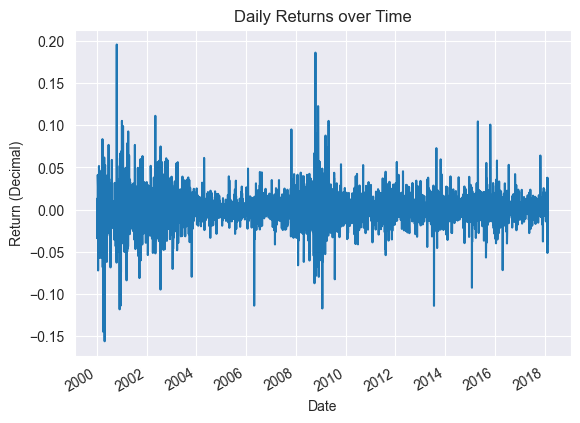

In [3]:
# Set the index of teh DataFrame to the date column
StockPrices = StockPrices.set_index('Date')

# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Check the first five rows of StockPrices
print(StockPrices.head())

# Plot the returns column over time
StockPrices['Returns'].plot()
plt.title('Daily Returns over Time')
plt.ylabel('Return (Decimal)')
plt.show()

### Return distributions

In order to analyze the probability of outliers in returns, it is helpful to visualize the historical returns of a stock using a histogram.

You can use the histogram to show the historical density or frequency of a given range of returns. Note the outliers on the left tail of the return distribution are what you often want to avoid, as they represent large negative daily returns. Outliers on the right hand side of the distribution are normally particularly good events for the stock such as a positive earnings surprise.

`StockPrices` from the previous exercise is available in your workspace, and `matplotlib.pyplot` is imported as `plt`.

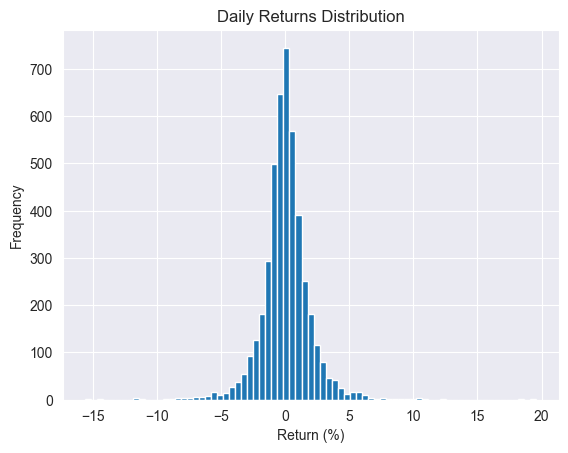

In [4]:
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins=75, density=False, edgecolor='white')
plt.title('Daily Returns Distribution')
plt.xlabel('Return (%)')
plt.ylabel('Frequency')
plt.show()

### First moment: Mu

You can calculate the average historical return of a stock by using `numpy`'s `mean()` function.

When you are calculating the average daily return of a stock, you are essentially estimating the **first moment** ($\mu$) of the historical returns distribution.

But what use are daily return estimates to a long-term investor? You can use the formula below to estimate the **average annual return** of a stock given the average daily return and the number of trading days in a year (_typically there are roughly 252 trading days in a year_):

$$
\text{Average Annualized Return} = ((1 + \mu)^{252}) - 1
$$

The `StockPrices` object from the previous exercise is stored as a variable.

In [5]:
# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print(mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(mean_return_annualized)

0.00037777546435757676
0.09985839482852632


### Second moment: Variance

Just like you estimated the first moment of the returns distribution in the last exercise, you can can also estimate the _second moment_, or **variance** of a return distribution using `numpy`.

In this case, you will first need to calculate the daily standard deviation ($\sigma$), or **volatility** of the returns using `np.std()`. _The variance is simply_ $\sigma^2$.

`StockPrices` from the previous exercise is available in your workspace, and `numpy` is imported as `np`.

In [6]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print(sigma_daily)

# Calculate the daily variance
variance_daily = sigma_daily**2
print(variance_daily)

0.019341100408708317
0.00037407816501973704


### Annualizing variance

You can't annualize the variance in the same way that you annualized the mean.

In this case, you will need to multiply $\sigma$ by the square root of the number of trading days in a year. There are typically 252 trading days in a calendar year. Let's assume this is the case for this exercise.

This will get you the annualized volatility, but to get annualized variance, you'll need to square the annualized volatility just like you did for the daily calculation.

`sigma_daily` from the previous exercise is available in your workspace, and `numpy` is imported as `np`.

In [7]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*(252**0.5)
print(sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print(variance_annualized)

0.3070304505826315
0.09426769758497373


### Third moment: Skewness

To calculate the _third moment_, or **skewness** of a returns distribution in Python, you can use the `skew()` function from `scipy.stats`.

Remember that a negative skew is a right-leaning curve, while positive skew is a left-leaning curve. In finance, you would tend to want positive skewness, as this would mean that the probability of large positive returns is unusually high, and the negative returns are more closely clustered and predictable.

`StockPrices` from the previous exercise is available in your workspace.

In [8]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = StockPrices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(returns_skewness)

0.21935459193067805


### Fourth moment: Kurtosis

Finally, to calculate the fourth moment of a distribution, you can use the `kurtosis()` function from `scipy.stats`.

Note that this function actually returns the **excess kurtosis**, not the 4th moment itself. In order to calculate kurtosis, simply add 3 to the excess kurtosis returned by `kurtosis()`.

`clean_returns` from the previous exercise is available in your workspace.

In [9]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print(excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis + 3
print(fourth_moment)

10.314572618025519
13.314572618025519


### Statistical tests for normality

In order to truly be confident in your judgement of the normality of the stock's return distribution, you will want to use a true statistical test rather than simply examining the kurtosis or skewness.

You can use the `shapiro()` function from `scipy.stats` to run a Shapiro-Wilk test of normality on the stock returns. The function will return two values in a list. The first value is the t-stat of the test, and the second value is the p-value. You can use the p-value to make a judgement about the normality of the data. If the p-value is **less than or equal to 0.05**, you can safely reject the null hypothesis of normality and assume that the data are non-normally distributed.

`clean_returns` from the previous exercise is available in your workspace.

In [10]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: ShapiroResult(statistic=0.9003633260726929, pvalue=0.0)
P-value:  0.0


### Calculating portfolio returns

In order to build and backtest a portfolio, you have to be comfortable working with the returns of multiple assets in a single object.

In this exercise, you will be using a `pandas` `DataFrame` object, already stored as the variable `StockReturns`, to hold the returns of multiple assets and to calculate the returns of a model portfolio.

The model portfolio is constructed with pre-defined weights for some of the largest companies in the world just before January 2017:

| Company Name        | Ticker | Portfolio Weight |
|---------------------|--------|------------------|
| Apple               | AAPL   | 12%              |
| Microsoft           | MSFT   | 15%              |
| Exxon Mobil         | XOM    | 8%               |
| Johnson & Johnson   | JNJ    | 5%               |
| JP Morgan           | JPM    | 9%               |
| Amazon              | AMZN   | 10%              |
| General Electric    | GE     | 11%              |
| Facebook            | FB     | 14%              |
| AT&T                | T      | 16%              |

_Note that the portfolio weights should sum to 100% in most cases_

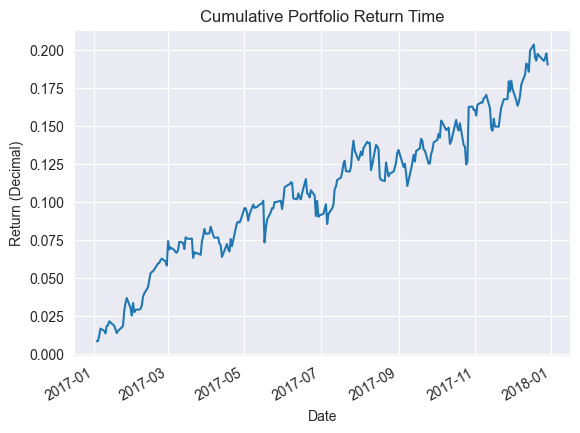

In [11]:
fpath_csv = './datasets/Big9Returns2017.csv'
StockReturns = pd.read_csv(fpath_csv, parse_dates=['Date']).set_index('Date')

# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.title('Cumulative Portfolio Return Time')
plt.ylabel('Return (Decimal)')
plt.show()

### Equal weighted portfolios

When comparing different portfolios, you often want to consider performance versus a naive equally-weighted portfolio. If the portfolio doesn't outperform a simple equally weighted portfolio, you might want to consider another strategy, or simply opt for the naive approach if all else fails. You can expect equally-weighted portfolios to tend to outperform the market when the largest companies are doing poorly. This is because even tiny companies would have the same weight in your equally-weighted portfolio as Apple or Amazon, for example.

To make it easier for you to visualize the cumulative returns of portfolios, we defined the function `cumulative_returns_plot()` in your workspace.

In [12]:
def cumulative_returns_plot(returns, cols): 
    """
    cols: A list of column names to plot 
    """
    
    CumulativeReturns = ((1+returns[cols]).cumprod()-1) 
    CumulativeReturns.plot() 
    plt.show()

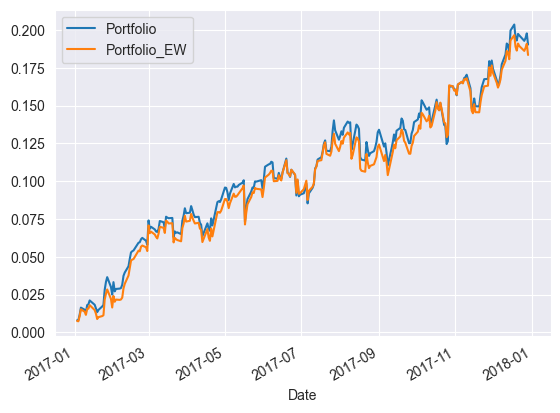

In [13]:
# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, :numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
cumulative_returns_plot(StockReturns, ['Portfolio', 'Portfolio_EW'])

### Market-cap weighted portfolios

Conversely, when large companies are doing well, **market capitalization**, or "market cap" weighted portfolios tend to outperform. This is because the largest weights are being assigned to the largest companies, or the companies with the largest market cap.

Below is a table of the market capitalizations of the companies in your portfolio just before January 2017:

| Company Name        | Ticker | Market Cap ($ Billions) |
|---------------------|--------|-------------------------|
| Apple               | AAPL   | 601.51                  |
| Microsoft           | MSFT   | 469.25                  |
| Exxon Mobil         | XOM    | 349.5                   |
| Johnson & Johnson   | JNJ    | 310.48                  |
| JP Morgan           | JPM    | 299.77                  |
| Amazon              | AMZN   | 356.94                  |
| General Electric    | GE     | 268.88                  |
| Facebook            | FB     | 331.57                  |
| AT&T                | T      | 246.09                  |

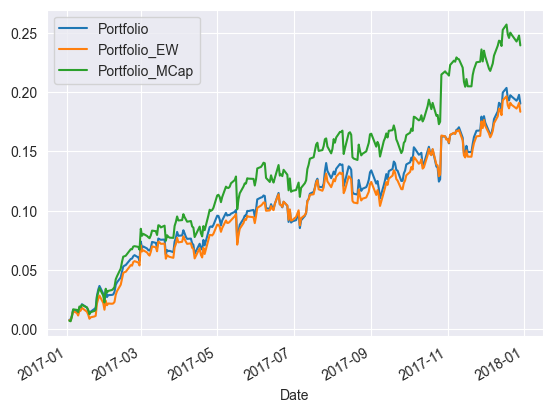

In [14]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = market_capitalizations / np.sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
cumulative_returns_plot(StockReturns, ['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'])

### The correlation matrix

The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets. You can use the built-in `.corr()` method on a `pandas` DataFrame to easily calculate the correlation matrix.

Correlation ranges from -1 to 1. The diagonal of the correlation matrix is always 1, because a stock always has a perfect correlation with itself. The matrix is symmetric, which means that the lower triangle and upper triangle of the matrix are simply reflections of each other since correlation is a bi-directional measurement.

In this exercise, you will use the `seaborn` library to generate a heatmap.

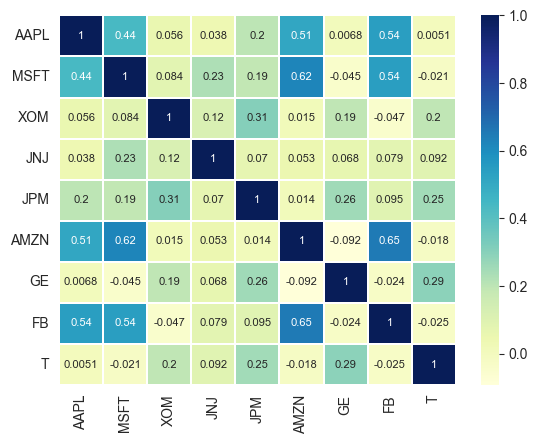

In [15]:
# Import seaborn as sns
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = StockReturns.iloc[:, :9].corr()

# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

### The co-variance matrix

You can easily compute the **co-variance matrix** of a DataFrame of returns using the `.cov()` method.

The correlation matrix doesn't really tell you anything about the variance of the underlying assets, only the linear relationships between assets. The co-variance (a.k.a. variance-covariance) matrix, on the other hand, contains all of this information, and is very useful for portfolio optimization and risk management purposes.

In [16]:
# Calculate the covariance matrix
cov_mat = StockReturns.iloc[:, :9].cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat * 252

# Print the annualized co-variance matrix
print(cov_mat_annual)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  0.030996  0.011400  0.001093  0.000774  0.005716  0.018805  0.000236   
MSFT  0.011400  0.021912  0.001392  0.003899  0.004597  0.019275 -0.001315   
XOM   0.001093  0.001392  0.012500  0.001548  0.005554  0.000354  0.004295   
JNJ   0.000774  0.003899  0.001548  0.013092  0.001307  0.001266  0.001540   
JPM   0.005716  0.004597  0.005554  0.001307  0.026371  0.000474  0.008283   
AMZN  0.018805  0.019275  0.000354  0.001266  0.000474  0.043954 -0.003830   
GE    0.000236 -0.001315  0.004295  0.001540  0.008283 -0.003830  0.039270   
FB    0.016243  0.013682 -0.000890  0.001545  0.002631  0.023290 -0.000821   
T     0.000152 -0.000530  0.003751  0.001780  0.006972 -0.000638  0.009849   

            FB         T  
AAPL  0.016243  0.000152  
MSFT  0.013682 -0.000530  
XOM  -0.000890  0.003751  
JNJ   0.001545  0.001780  
JPM   0.002631  0.006972  
AMZN  0.023290 -0.000638  
GE   -0.000821  0.009849  
FB 

Since variance is the square of volatility, you didn't have to multiply by the square root of 252.

### Portfolio standard deviation

In order to calculate portfolio volatility, you will need the covariance matrix, the portfolio weights, and knowledge of the transpose operation. The transpose of a numpy array can be calculated using the `.T` attribute. The `np.dot()` function is the dot-product of two arrays.

The formula for portfolio volatility is:

$$
\sigma_{\text{Portfolio}} = \sqrt{w_\text{T} \cdot \Sigma \cdot w}
$$

- $\sigma_{\text{Portfolio}}$: Portfolio volatility
- $\Sigma$: Covariance matrix of returns
- $w$: Portfolio weights ($w_\text{T}$ is transposed portfolio weights)
- $\cdot$: The dot-multiplication operator

`portfolio_weights` and `cov_mat_annual` are available in your workspace.

In [17]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.08931417642713795


### The efficient frontier

One of the ways to construct the efficient frontier of risk vs return given a set of assets is to randomly generate combinations and plot the characteristics of each portfolio. In this plot, the x-axis is the risk (standard deviation) and the y-axis is the expected return of each portfolio.

![Efficient Frontier Quiz](./figs/EffFrontierQuiz.png)

Each investment has a historical risk level and a historical return. Note how some assets are more superior than others historically, but some are hard to choose between.

Which investment has the best historical risk / return characteristics? It's a tossup! Investment A has the best risk characteristics, but Investment C has a higher expected return.

### Sharpe ratios

The Sharpe ratio is a simple metric of risk adjusted return which was pioneered by William F. Sharpe. Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return. In finance, you are always seeking ways to improve your Sharpe ratio, and the measure is very commonly quoted and used to compare investment strategies.

The original 1966 Sharpe ratio calculation is quite simple:

$$
S = \frac{R_a - r_f}{\sigma_a}
$$

- $S$: Sharpe Ratio
- $R_a$: Asset return
- $r_f$: Risk-free rate of return
- $\sigma_a$: Asset volatility

The randomly generated portfolio is available as `RandomPortfolios`.

In [18]:
fpath_csv = './datasets/EfficientFrontierPortfoliosSlim.csv'
RandomPortfolios = pd.read_csv(fpath_csv)

In [19]:
# Risk free rate
risk_free = 0

# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns'] - risk_free) / RandomPortfolios['Volatility']

# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


The portfolio historical Sharpe ratios range from 0.742 to 2.27.

### The MSR portfolio

The maximum Sharpe ratio, or **MSR** portfolio, which lies at the apex of the efficient frontier, can be constructed by looking for the portfolio with the highest Sharpe ratio.

Unfortunately, the MSR portfolio is often quite erratic. Even though the portfolio had a high historical Sharpe ratio, it doesn't guarantee that the portfolio will have a good Sharpe ratio moving forward.

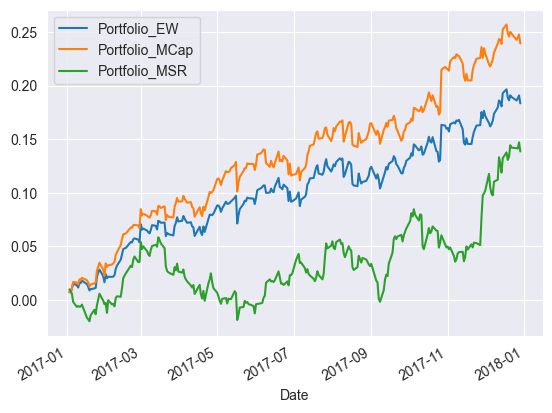

In [20]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(StockReturns, ['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR'])

Returns are harder to predict, making the MSR unstable.

### The GMV portfolio

The global minimum volatility portfolio, or **GMV** portfolio, is the portfolio with the lowest standard deviation (risk) and the highest return for the given risk level.

Returns are very hard to predict, but volatilities and correlations tend to be more stable over time. This means that the GMV portfolio often outperforms the MSR portfolios out of sample even though the MSR would outperform quite significantly in-sample. Of course, out of sample results are what really matters in finance.

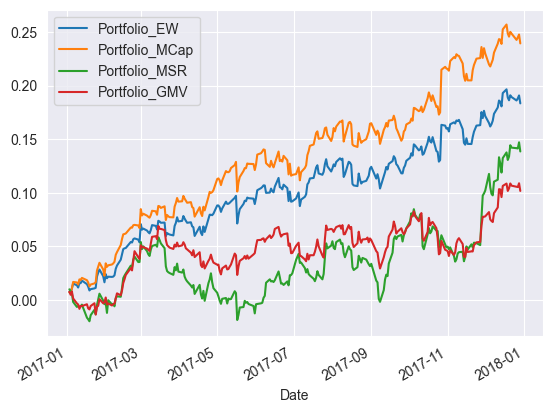

In [21]:
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(StockReturns, ['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR', 'Portfolio_GMV'])

The GMV portfolio tends to be the most stable optimization over time, but of course you can expect a lower volatility portfolio to have lower return than the benchmark market cap weighting method.

### Excess returns

In order to perform a robust analysis on your portfolio returns, you must first subtract the risk-free rate of return from your portfolio returns. The portfolio return minus the risk-free rate of return is known as the **Excess Portfolio Return**.

In the United States, the risk-free rate has been close to 0 since the financial crisis (2008), but this step is crucial for other countries with higher risk-free rates such as Venezuela or Brazil.

The `FamaFrenchData` DataFrame is available in your workspace and contains the proper data for this exercise. The portfolio you will be working with is the equal-weighted portfolio from Chapter 2.

In [22]:
fpath_csv = './datasets/FamaFrenchFactors.csv'
FamaFrenchData = pd.read_csv(fpath_csv, parse_dates=['Date']).set_index('Date')

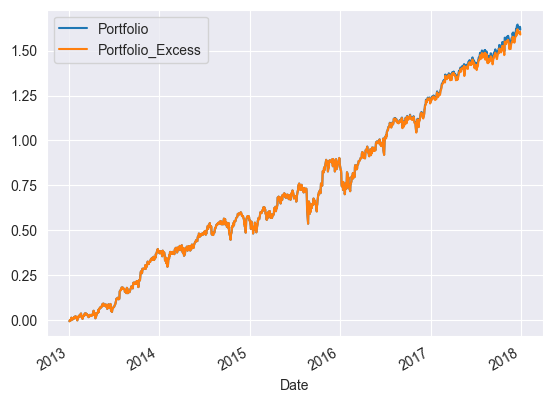

In [23]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

Notice how the excess return is only slightly less? That's because the risk free rate has been so low!

### Calculating beta using co-variance

Beta is an essential component of many financial models, and is a measure of systematic risk, or exposure to the broad market. In the CAPM model, beta is one of two essential factors.

Historical beta can be estimated in a number of ways. In this exercise, you will use the following simple formula involving co-variance and variance to a benchmark market portfolio:

$$
\beta_P = \frac{\text{Cov}(R_P, R_B)}{\text{Var}(R_B)}
$$

- $\beta_P$: Portfolio beta
- $\text{Cov}(R_P, R_B)$: The co-variance between the portfolio ($P$) and the benchmark market index ($B$)
- $\text{Var}(R_B)$: The variance of the benchmark market index

The `FamaFrenchData` DataFrame is available in your workspace and contains the proper data for this exercise.

In [24]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient / benchmark_variance
print(portfolio_beta)

5.726126338154967e-05
5.880335088211895e-05
0.973775516574546


The portfolio beta is 0.9738. You can think of market beta as a measure of your exposure to the broad stock market. For every 1.0% rise (or fall) in the market, you can expect the portfolio to rise (fall) roughly 0.97%.

### Calculating beta with CAPM

There are many ways to model stock returns, but the **Capital Asset Pricing Model**, or CAPM, is one the most well known:

$$
E(R_P) - RF = \beta_P(E(R_M) - RF)
$$

- $E(R_P) - RF$: The excess expected return of a stock or portfolio $P$
- $E(R_M) - RF$: The excess expected return of the broad market portfolio $B$
- $RF$: The regional risk free-rate
- $\beta_P$: Portfolio beta, or exposure, to the broad market portfolio $B$

You can call the `.fit()` method from `statsmodels.formula.api` on an `.ols(formula, data)` model object to perform the analysis, and the `.summary()` method on the analysis object to anaylze the results.

The `FamaFrenchData` DataFrame is available in your workspace and contains the proper data for this exercise.

In [25]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print(regression_beta)

0.7942627160017839
0.9737755165745456


Your portfolio beta is once again 0.9738. The adjusted r-squared is 0.7943. A high adjusted r-squared (close to 1) means that the majority of your portfolio's movements can be explained by the factors in your 

### Adjusted R-squared

Let's assume you conducted two different regression analyses using different financial models to explain returns. Based on the information below, which model is most likely superior?

| Model   | R-Squared | Adjusted R-Squared |
|---------|-----------|----------------------|
| Model 1 | 0.60      | 0.35                 |
| Model 2 | 0.95      | 0.40                 |
| Model 3 | 0.90      | 0.75                 |

Model 3 is superior. Model 3 has the highest adjusted r-squared.

### The Fama French 3-factor model

The Fama-French model famously adds two additional factors to the CAPM model to describe asset returns:

$$
R_P = RF + \beta_M(R_M - RF) + b_{SMB} \cdot SMB + b_{HML} \cdot HML + \alpha
$$

- $SMB$: The small minus big factor
- $b_{SMB}$: Exposure to the $SMB$ factor
- $HML$: The high minus low factor
- $b_{HML}$: Exposure to the $HML$ factor
- $\alpha$: Performance which is unexplained by any other factors
- $\beta_M$: Beta to the broad market portfolio $B$

The `FamaFrenchData` DataFrame is available in your workspace and contains the `HML` and `SMB` factors as columns for this exercise.

In [26]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8193910088585152


The Fama-French 3 factor model fit well, raising the adjusted r-squared from 0.7943 to 0.8194, meaning that the model explains more of your portfolio variance. But there's still room for improvement...

### p-values and coefficients

You can use the `.pvalues` attribute on a fitted `smf.ols` regression model to retrieve the p-values for each coefficient.

Normally, p-values less than 0.05 are considered statistically significant.

Coefficients can be extracted from the fitted regression object using the `.params` attribute.

In this example, a statistically significant negative SMB ('Small Minus Big') coefficient would signify a factor exposure to large cap stocks, while a positive coefficient would signify an exposure to small cap stocks.

The fitted regression model `FamaFrench_fit` from the previous exercise is available in your workspace.

In [27]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.26215152743192593  and is  significant


Your portfolio has a statistically significant negative exposure (-0.2621) to small-cap stocks - in other words - positive exposure to large caps!

### Economic intuition in factor modeling

Finance is all about risk and return. Higher risk tends to lead to higher returns over time, and lower risk portfolios tend to lead to lower returns over time.

In the Fama-French factor model:

- The **HML factor** is constructed by calculating the return of **growth** stocks, or stocks with high valuations, versus the return of **value** stocks.
- The **SMB factor** is constructed by calculating the return of **small-cap** stocks, or stocks with small market capitalizations, versus the return of **large-cap** stocks.

What would you expect to be historically true about the size factor?

Historically: Small-cap + Value stocks should have the highest returns and risk. Since 1982, value stocks have outperformed growth stocks in the majority of cases, and the tide often shifts during times of crisis and during bubbles such as the dot-com bubble during the late 1990's and early 2000's.

### The efficient market and alpha

The **alpha** ($\alpha$) left over by the regression is unexplained performance due to unknown factors. In a regression model, this is simply the coefficient of the intercept.

There are two general schools of thought as to why:

- The model simply needs to be expanded. When you have found all of the missing economic factors, you can explain all stock and portfolio returns. This is known as the **Efficient Market Hypothesis**.
- There is a degree of unexplainable performance that no model will ever capture reliably. Perhaps it is due to skill, timing, intuition or luck, but investors should seek to maximize their alpha.

Your fitted regression analysis from the previous exercise has been stored in `FamaFrench_fit`.

In [28]:
# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params['Intercept']
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = (1+portfolio_alpha)**252 - 1
print(portfolio_alpha_annualized)

0.00018326665203183008
0.04726181730280854


Your annualized portfolio alpha is 4.73%

### The 5-factor model

In 2015, Fama and French extended their previous 3-factor model, adding two additional factors:

- **RMW**: Profitability
- **CMA**: Investment

The RMW factor represents the returns of companies with high operating profitability versus those with low operating profitability, and the CMA factor represents the returns of companies with aggressive investments versus those who are more conservative.

The `FamaFrenchData` object is available in your workspace and contains the `RMW` and `CMA` factors in addition to the previous factors.

In [29]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA ', data=FamaFrenchData)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.8367245019225793


The adjusted r-squared is even higher at 0.8367.

### Alpha vs R-squared

The results of the 3 models you constructed are in line with Fama and French's findings, with the 5-factor model being superior at explaining portfolio returns.

| Model                 | Adjusted R-Squared |
|-----------------------|----------------------|
| CAPM                  | 0.7943               |
| Fama-French 3 Factor  | 0.8194               |
| Fama-French 5 Factor  | 0.8367               |

Without examining the regression intercepts directly, what do these results tell you about the alpha estimated by each model?

The Fama-French 5-factor model explains the most variability, so alpha is lower. But Cliff Assness says this model is not sufficient and that momentum should be taken into account.

### Historical drawdown

The stock market tends to rise over time, but that doesn't mean that you won't have periods of drawdown.

Drawdown can be measured as the percentage loss from the highest cumulative historical point.

In Python, you can use the `.accumulate()` and `.maximum()` functions to calculate the running maximum, and the simple formula below to calculate drawdown:

$$
\text{Drawdown} = \frac{r_t}{RM} - 1
$$

- $r_t$: Cumulative return at time $t$
- $RM$: Running maximum

The cumulative returns of USO, an ETF that tracks oil prices, is available in the variable `cum_rets`.

In [30]:
fpath_csv = './datasets/USO.csv'
uso = pd.read_csv(fpath_csv, parse_dates=['Date']).set_index('Date')
cum_rets = (uso+1).cumprod()

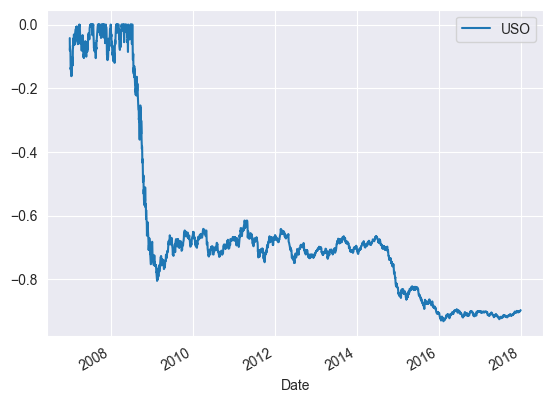

In [31]:
# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets)

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cum_rets)/running_max - 1

# Plot the results
drawdown.plot()
plt.show()

Notice how the drawdown never goes above 0 (as opposed to the previous plot)? That's because a positive drawdown isn't a drawdown at all - its a gain!

### Historical value at risk

Drawdown is a measure of sustained losses over time, but what about simple single-day movements?

**Value at Risk**, often referred to as VaR, is a way to estimate the risk of a single day negative price movement. VaR can be measured for any given probability, or confidence level, but the most commonly quoted tend to be VaR(95) and VaR(99). Historical VaR is the simplest method to calculate VaR, but relies on historical returns data which may not be a good assumption of the future. Historical VaR(95), for example, represents the minimum loss that your portfolio or asset has sustained in the worst 5% of cases.

Below, you will calculate the historical VaR(95) of the USO oil ETF. Returns data is available (in percent) in the variable `StockReturns_perc`.

In [32]:
StockReturns_perc = uso['USO'] * 100

-3.608233764037496


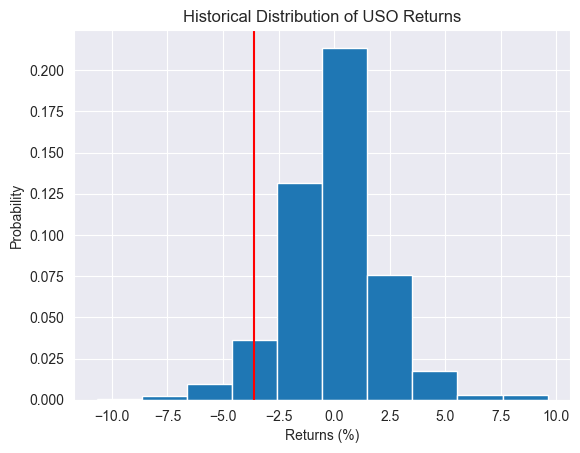

In [33]:
# Calculate historical VaR(95)
var_95 = np.percentile(StockReturns_perc, 100-95)
print(var_95)

# Sort the returns for plotting
sorted_rets = StockReturns_perc.sort_values()

# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, density=True, stacked=True, edgecolor='white')
plt.title('Historical Distribution of USO Returns')
plt.ylabel('Probability')
plt.xlabel('Returns (%)')

# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
plt.show()

Historical VaR(95) = -3.61%

### Historical expected shortfall

**Expected Shortfall**, otherwise known as **CVaR**, or conditional value at risk, is simply the expected loss of the worst case scenarios of returns.

For example, if your portfolio has a VaR(95) of -3%, then the CVaR(95) would be the average value of all losses exceeding -3%.

Returns data is available (in percent) in the variable `StockReturns_perc`. `var_95` from the previous exercise is also available in your workspace.

-5.054143158346777


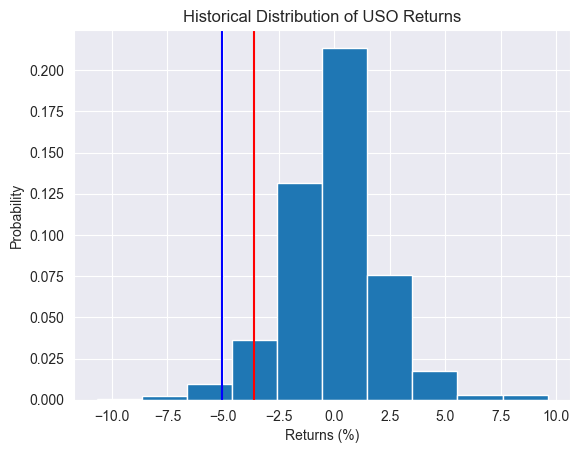

In [34]:
# Historical CVaR 95
cvar_95 = np.mean(StockReturns_perc[StockReturns_perc <= var_95])
print(cvar_95)

# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each return quantile
plt.hist(sorted_rets, density=True, stacked=True, edgecolor='white')
plt.title('Historical Distribution of USO Returns')
plt.ylabel('Probability')
plt.xlabel('Returns (%)')

# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle="-", label='VaR 95: {0:.2f}%'.format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-', label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.show()

Notice how the CVaR(95) of -5.05% was more extreme than the VaR(95) level?

### Changing VaR and CVaR quantiles

VaR quantiles often used are 90%, 95%, and 99%, corresponding to the worst 10%, 5%, and 1% of cases respectively. These same quantiles are also often used for CVaR. Note that CVaR will always be a more extreme estimate when compared with VaR for the same quantile.

Compare the VaR vs CVaR values for USO ETF returns below.

Returns data is available (in percent) in `StockReturns_perc`. We also calculated `var_95`, `cvar_95`, `var_99`, `cvar_99` and defined a function `plot_hist()` that compares several quantiles for you.

In [35]:
def plot_hist():
    plt.hist(sorted_rets, density=True, stacked=True)
    # Charting parameters
    plt.xlabel('Returns (%)')
    plt.ylabel('Probability')
    plt.title('Historical Distribution of USO Returns', fontsize=18, fontweight='bold')
    plt.axvline(x=var_90, color='r', linestyle='-', label="VaR 90: {0:.2f}%".format(var_90))
    plt.axvline(x=var_95, color='g', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
    plt.axvline(x=var_99, color='b', linestyle='-', label="VaR 99: {0:.2f}%".format(var_99))
    plt.axvline(x=cvar_90, color='r', linestyle='--', label="CVaR 90: {0:.2f}%".format(cvar_90))
    plt.axvline(x=cvar_95, color='g', linestyle='--', label="CVaR 95: {0:.2f}%".format(cvar_95))
    plt.axvline(x=cvar_99, color='b', linestyle='--', label="CVaR 99: {0:.2f}%".format(cvar_99))
    plt.legend(loc='upper right')
    plt.show()

-2.558512646965176
-4.043186770518807


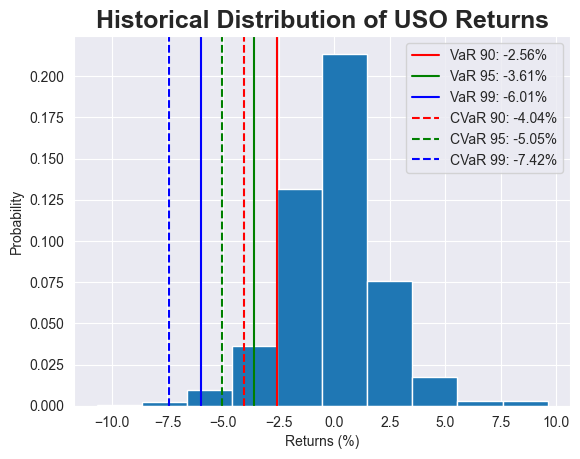

In [36]:
# Historical VaR(90) quantiles
var_90 = np.percentile(StockReturns_perc, 100-90)
print(var_90)

# Historical CVaR(90) quantiles
cvar_90 = np.mean(StockReturns_perc[StockReturns_perc <= var_90])
print(cvar_90)

# Calculate historical VaR(95) and CVaR(95)
var_95 = np.percentile(StockReturns_perc, 100-95)
cvar_95 = np.mean(StockReturns_perc[StockReturns_perc <= var_95])

# Calculate historical VaR(99) and CVaR(99)
var_99 = np.percentile(StockReturns_perc, 100-99)
cvar_99 = np.mean(StockReturns_perc[StockReturns_perc <= var_99])

# Plot to compare
plot_hist()

The CVaR(90) is -4.04%, which is higher than the VaR(90) of -2.56%.

### Parametric VaR

Value at Risk can also be computed parametrically using a method known as variance/co-variance VaR. This method allows you to simulate a range of possibilities based on historical return distribution properties rather than actual return values. You can calculate the parametric VaR(90) using: 

```python
# Import norm from scipy.stats
from scipy.stats import norm

# Calculate Parametric VaR
norm.ppf(0.10, mu, vol)
```

where `mu` and `vol` are the mean and volatility, respectively.

Returns data is available (in decimals) in the variable `StockReturns.`

In [37]:
StockReturns = uso['USO']

In [38]:
# Import norm from scipy.stats
from scipy.stats import norm

# Estimate the average daily return
mu = np.mean(StockReturns)

# Estimate the daily volatility
vol = np.std(StockReturns)

# Set the VaR confidence level
confidence_level = 0.05

# Calculate Parametric VaR
var_95 = norm.ppf(confidence_level, mu, vol)
print('Mean: ', str(mu), '\nVolatility: ', str(vol), '\nVaR(95): ', str(var_95))

Mean:  -0.00028638956240214787 
Volatility:  0.021888087129708852 
VaR(95):  -0.03628908906473361


The parametric VaR(95) is -3.63%.

### Scaling risk estimates

The VaR(95) number calculated in previous exercises is simply the value at risk for a single day. To estimate the VaR for a longer time horizon, scale the value by the square root of time, similar to scaling volatility:

$$
\text{VaR}(95)_{t \text{ days}} = \text{VaR}(95)_{1 \text{ day}} \times \sqrt{t}
$$

`StockReturns_perc` and `var_95` from the previous exercise is available in your workspace. Use this data to estimate the VaR for the USO oil ETF for 1 to 100 days from now. We've also defined a function `plot_var_scale()` that plots the VaR for 1 to 100 days from now.

In [39]:
def plot_var_scale():
    # Plot the forecased vs time
    plt.plot(forecasted_values[:,0], -1*forecasted_values[:,1])
    plt.xlabel('Time Horizon T+i')
    plt.ylabel('Forecasted VaR 95 (%)')
    plt.title('VaR 95 Scaled by Time', fontsize=18, fontweight='bold')
    plt.show()

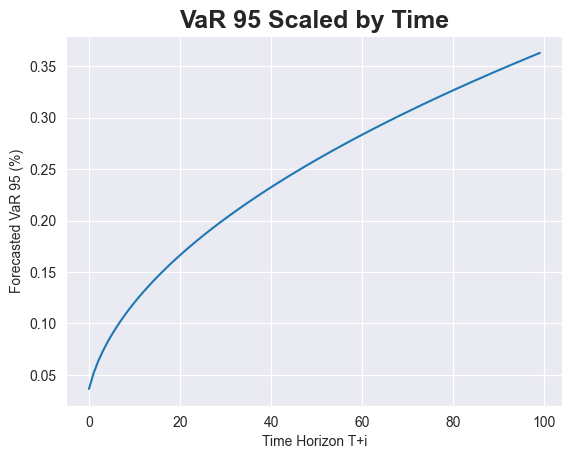

In [40]:
# Aggregate forecasted VaR
forecasted_values = np.empty([100, 2])

# Loop through each forecast period
for i in range(100):
    # Save the time horizon i
    forecasted_values[i, 0] = i
    # Save the forecasted VaR 95
    forecasted_values[i, 1] = var_95 * np.sqrt(i+1)
    
# Plot the results
plot_var_scale()

Notice how the plot resembles a square root?

### A random walk simulation

Stochastic or random movements are used in physics to represent particle and fluid movements, in mathematics to describe fractal behavior, and in finance to describe stock market movements.

Use the `np.random.normal()` function to model random walk movements of the USO oil ETF with a constant daily average return (mu) and average daily volatility (vol) over the course of T trading days.

In [41]:
np.random.seed(123)

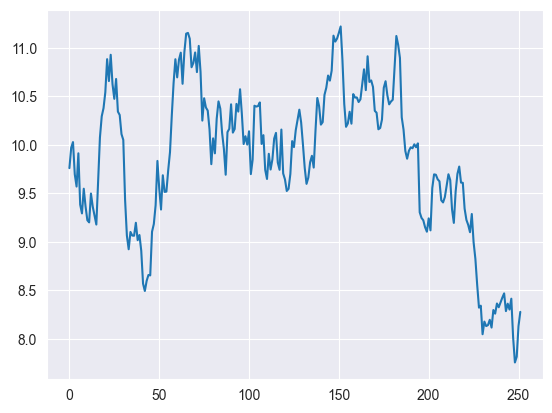

In [42]:
# Set the simulation parameters
mu = np.mean(StockReturns)
vol = np.std(StockReturns)
T = 252
S0 = 10

# Add one to the random returns
rand_rets = np.random.normal(mu, vol, T) + 1

# Forecasted random walk
forecasted_values = S0 * rand_rets.cumprod()

# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

### Monte Carlo simulations

Monte-Carlo simulations are used to model a wide range of possibilities.

Monte-Carlos can be constructed in many different ways, but all of them involve generating a large number of random variants of a given model, allowing a wide distribution of possible paths to be analyzed. This can allow you to build a comprehensive forecast of possibilities to sample from without a large amount of historical data.

Generate 100 Monte-Carlo simulations for the USO oil ETF.

The parameters `mu`, `vol`, `T`, and `S0` are available from the previous exercise.

In [43]:
np.random.seed(123)

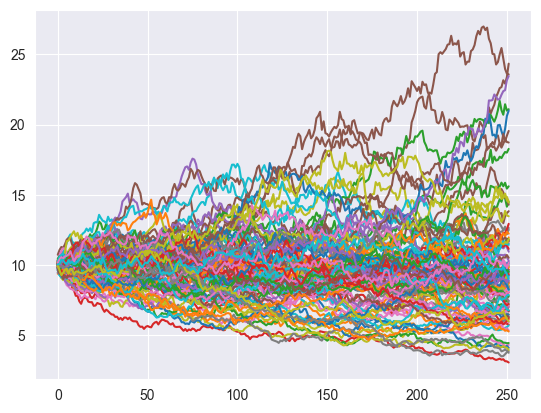

In [44]:
# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

### Monte Carlo VaR

Both the return values and the Monte-Carlo paths can be used for analysis of everything ranging from option pricing models and hedging to portfolio optimization and trading strategies.

Aggregate the returns data at each iteration, and use the resulting values to forecast parametric VaR(99).

The parameters `mu`, `vol`, `T`, and `S0` are available from the previous exercise.

In [45]:
np.random.seed(123)

In [46]:
# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 100-99)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

Parametric VaR(99):  -5.04 %
